In [2]:
# pip install --upgrade palmerpenguins numpy pandas seaborn matplotlib empiricaldist statsmodels scikit-learn pyjanitor session-info
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss


In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

In [4]:
pnr = palmerpenguins.load_penguins_raw()
pn = palmerpenguins.load_penguins()

In [11]:
pnr.head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN


In [12]:
pnr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  333 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [48]:
pnr.dtypes

studyName               object
Sample Number            int64
Species                 object
Region                  object
Island                  object
Stage                   object
Individual ID           object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Comments                object
dtype: object

In [49]:
(
    pnr
    .dtypes
    .value_counts()
)

object     10
float64     6
int64       1
Name: count, dtype: int64

In [52]:
# variables 17
# observaciones 344
pnr.shape

(344, 17)

In [60]:
pnr.isnull().any()

studyName              False
Sample Number          False
Species                False
Region                 False
Island                 False
Stage                  False
Individual ID          False
Clutch Completion      False
Date Egg               False
Culmen Length (mm)      True
Culmen Depth (mm)       True
Flipper Length (mm)     True
Body Mass (g)           True
Sex                     True
Delta 15 N (o/oo)       True
Delta 13 C (o/oo)       True
Comments                True
dtype: bool

In [65]:
pnr.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     11
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               290
dtype: int64

In [66]:
pnr.isnull().sum().sum()

np.int64(336)

In [68]:
pnr.isnull().melt()

,variable,value
0,studyName,False
1,studyName,False
2,studyName,False
3,studyName,False
4,studyName,False
...,...,...
5843,Comments,True
5844,Comments,False
5845,Comments,False
5846,Comments,True


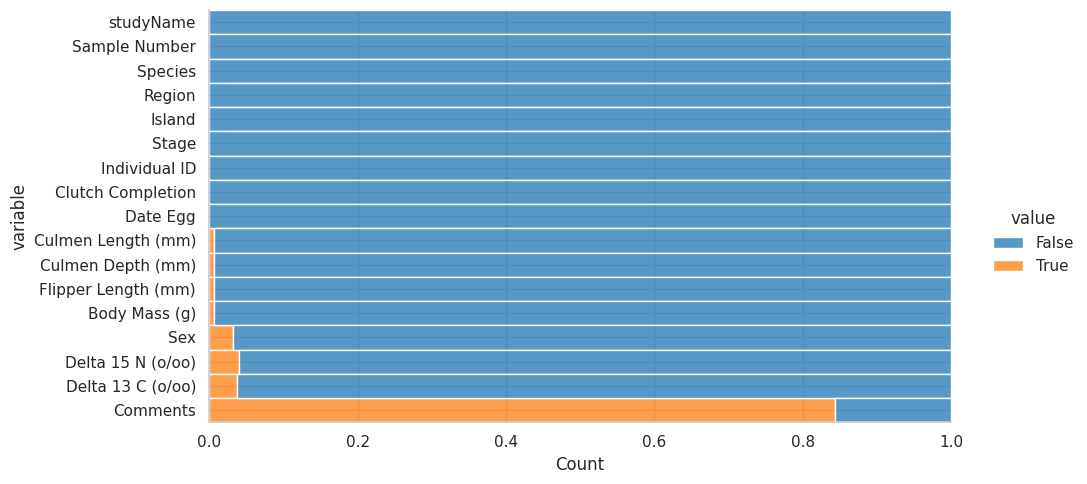

In [70]:
pnr.isnull().melt().pipe(
    lambda df: (
        sns.displot(
            data=df,
            y="variable",
            hue="value",
            multiple="fill",
            aspect=2
        )
    )
)

<Axes: >

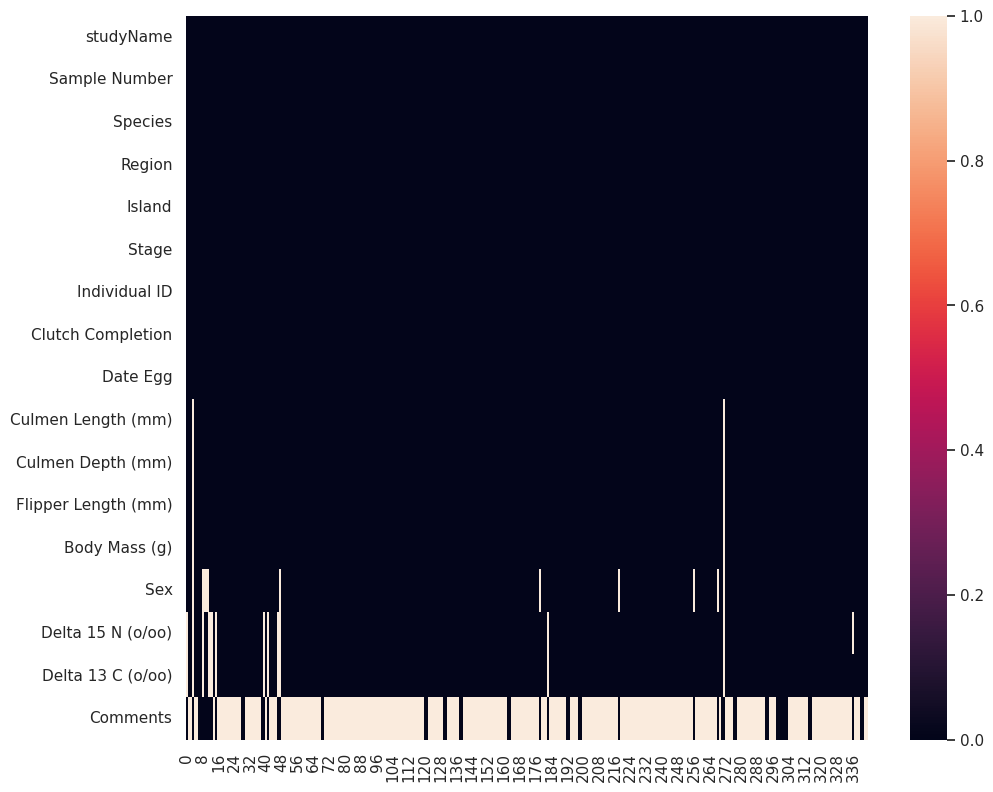

In [76]:
pnr.isnull().transpose().pipe(
    lambda df: (
        sns.heatmap(data=df)
    )
)

In [79]:
pnrl = pnr.copy()
del pnrl["Comments"]
pnrl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  333 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [ ]:
limpio = pnrl.dropna()
limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 1 to 343
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            324 non-null    object 
 1   Sample Number        324 non-null    int64  
 2   Species              324 non-null    object 
 3   Region               324 non-null    object 
 4   Island               324 non-null    object 
 5   Stage                324 non-null    object 
 6   Individual ID        324 non-null    object 
 7   Clutch Completion    324 non-null    object 
 8   Date Egg             324 non-null    object 
 9   Culmen Length (mm)   324 non-null    float64
 10  Culmen Depth (mm)    324 non-null    float64
 11  Flipper Length (mm)  324 non-null    float64
 12  Body Mass (g)        324 non-null    float64
 13  Sex                  324 non-null    object 
 14  Delta 15 N (o/oo)    324 non-null    float64
 15  Delta 13 C (o/oo)    324 non-null    float64


<Axes: >

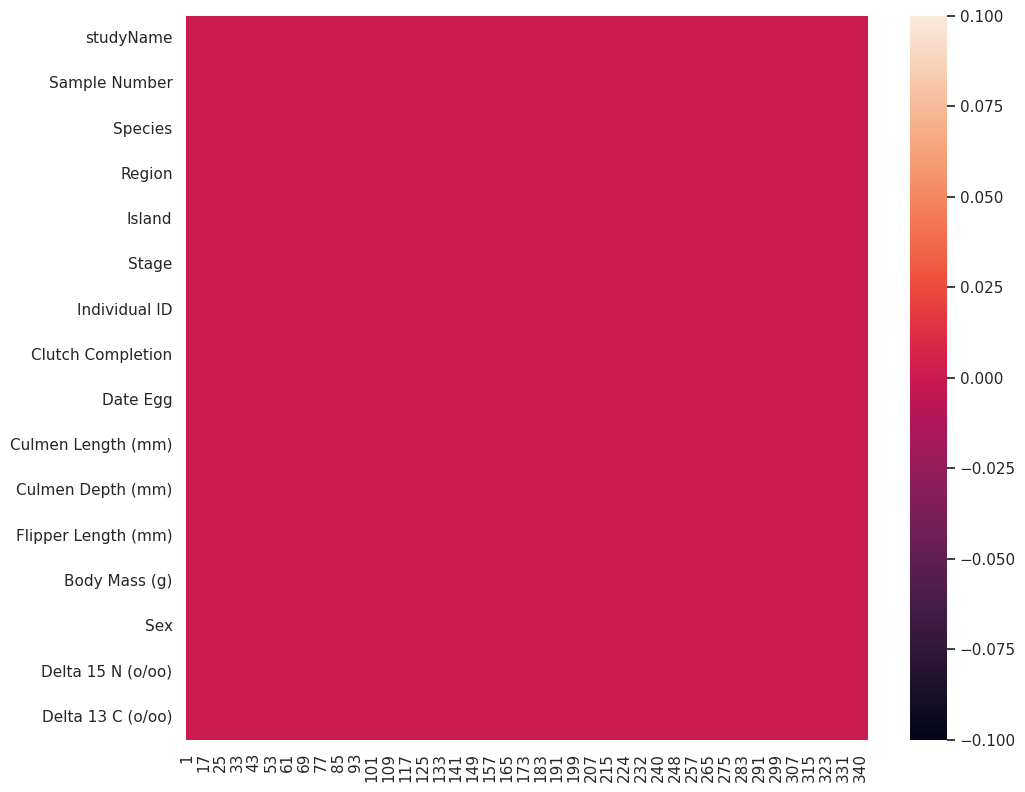

In [ ]:
limpio.isnull().transpose().pipe(
    lambda df: (
        sns.heatmap(data=df)
    )
)